In [1]:
%matplotlib inline


# Datasets

How to list and download datasets.


In [11]:
# License: BSD 3-Clauses

import openml
import pandas as pd
from openml.datasets import edit_dataset, fork_dataset, get_dataset

## Exercise 0

* List datasets

  * Use the output_format parameter to select output type
  * Default gives 'dict' (other option: 'dataframe', see below)




In [12]:
openml_list = openml.datasets.list_datasets()  # returns a dict

# Show a nice table with some key data properties
datalist = pd.DataFrame.from_dict(openml_list, orient="index")
datalist = datalist[["did", "name", "NumberOfInstances", "NumberOfFeatures", "NumberOfClasses"]]

print(f"First 10 of {len(datalist)} datasets...")
datalist.head(n=10)

# The same can be done with lesser lines of code
openml_df = openml.datasets.list_datasets(output_format="dataframe")
openml_df.head(n=10)

First 10 of 4040 datasets...


,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
2,2,anneal,1,1,active,ARFF,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
3,3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
5,5,arrhythmia,1,1,active,ARFF,245.0,13.0,2.0,13.0,280.0,452.0,384.0,408.0,206.0,74.0
6,6,letter,1,1,active,ARFF,813.0,26.0,734.0,26.0,17.0,20000.0,0.0,0.0,16.0,1.0
7,7,audiology,1,1,active,ARFF,57.0,24.0,1.0,24.0,70.0,226.0,222.0,317.0,0.0,70.0
8,8,liver-disorders,1,1,active,ARFF,NaN,NaN,NaN,0.0,6.0,345.0,0.0,0.0,6.0,0.0
9,9,autos,1,1,active,ARFF,67.0,22.0,3.0,6.0,26.0,205.0,46.0,59.0,15.0,11.0
10,10,lymph,1,1,active,ARFF,81.0,8.0,2.0,4.0,19.0,148.0,0.0,0.0,3.0,16.0
11,11,balance-scale,1,1,active,ARFF,288.0,3.0,49.0,3.0,5.0,625.0,0.0,0.0,4.0,1.0


## Exercise 1

* Find datasets with more than 10000 examples.
* Find a dataset called 'eeg_eye_state'.
* Find all datasets with more than 50 classes.



In [4]:
datalist[datalist.NumberOfInstances > 10000].sort_values(["NumberOfInstances"]).head(n=20)
""
datalist.query('name == "eeg-eye-state"')
""
datalist.query("NumberOfClasses > 50")

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1491,1491,one-hundred-plants-margin,1600.0,65.0,100.0
1492,1492,one-hundred-plants-shape,1600.0,65.0,100.0
1493,1493,one-hundred-plants-texture,1599.0,65.0,100.0
4552,4552,BachChoralHarmony,5665.0,17.0,102.0
41167,41167,dionis,416188.0,61.0,355.0
41169,41169,helena,65196.0,28.0,100.0
41960,41960,seattlecrime6,523590.0,8.0,144.0
41983,41983,CIFAR-100,60000.0,3073.0,100.0
42078,42078,beer_reviews,1586614.0,13.0,104.0
42087,42087,beer_reviews,1586614.0,13.0,104.0


### Download datasets



In [5]:
# This is done based on the dataset ID.
dataset = openml.datasets.get_dataset(1471)

# Print a summary
print(
    f"This is dataset '{dataset.name}', the target feature is "
    f"'{dataset.default_target_attribute}'"
)
print(f"URL: {dataset.url}")
print(dataset.description[:500])

This is dataset 'eeg-eye-state', the target feature is 'Class'
URL: https://old.openml.org/data/v1/download/1587924/eeg-eye-state.arff
**Author**: Oliver Roesler  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after


Get the actual data.

The dataset can be returned in 3 possible formats: as a NumPy array, a SciPy
sparse matrix, or as a Pandas DataFrame. The format is
controlled with the parameter ``dataset_format`` which can be either 'array'
(default) or 'dataframe'. Let's first build our dataset from a NumPy array
and manually create a dataframe.



In [6]:
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="array", target=dataset.default_target_attribute
)
eeg = pd.DataFrame(X, columns=attribute_names)
eeg["class"] = y
print(eeg[:10])

            V1           V2           V3           V4           V5  \
0  4329.229980  4009.229980  4289.229980  4148.209961  4350.259766   
1  4324.620117  4004.620117  4293.850098  4148.720215  4342.049805   
2  4327.689941  4006.669922  4295.379883  4156.410156  4336.919922   
3  4328.720215  4011.790039  4296.410156  4155.899902  4343.589844   
4  4326.149902  4011.790039  4292.310059  4151.279785  4347.689941   
5  4321.029785  4004.620117  4284.100098  4153.330078  4345.640137   
6  4319.490234  4001.030029  4280.509766  4151.790039  4343.589844   
7  4325.640137  4006.669922  4278.459961  4143.080078  4344.100098   
8  4326.149902  4010.770020  4276.410156  4139.490234  4345.129883   
9  4326.149902  4011.280029  4276.919922  4142.049805  4344.100098   

            V6           V7           V8           V9          V10  \
0  4586.149902  4096.919922  4641.029785  4222.049805  4238.459961   
1  4586.669922  4097.439941  4638.970215  4210.770020  4226.669922   
2  4583.589844  409

Instead of manually creating the dataframe, you can already request a
dataframe with the correct dtypes.



In [7]:
X, y, categorical_indicator, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, dataset_format="dataframe"
)
print(X.head())
print(X.info())

        V1       V2       V3       V4       V5       V6       V7       V8  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        V9      V10      V11      V12      V13      V14  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V

Sometimes you only need access to a dataset's metadata.
In those cases, you can download the dataset without downloading the
data file. The dataset object can be used as normal.
Whenever you use any functionality that requires the data,
such as `get_data`, the data will be downloaded.



In [8]:
dataset = openml.datasets.get_dataset(1471, download_data=False)

## Exercise 2
* Explore the data visually.



/Users/prabhant/opt/anaconda3/envs/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


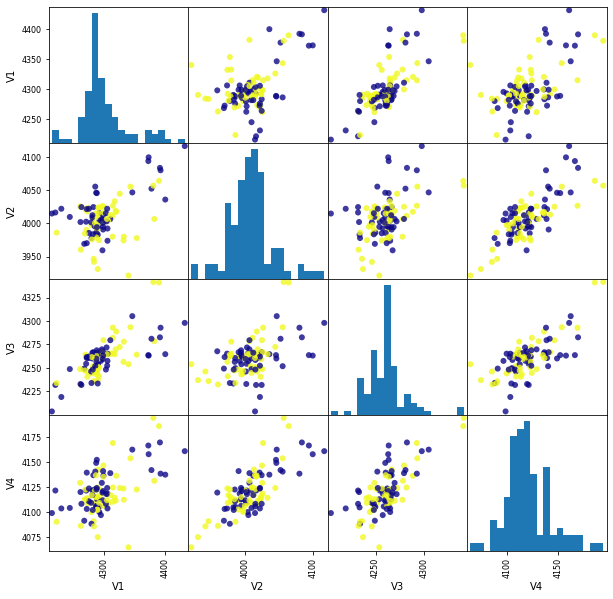

In [9]:
eegs = eeg.sample(n=1000)
_ = pd.plotting.scatter_matrix(
    eegs.iloc[:100, :4],
    c=eegs[:100]["class"],
    figsize=(10, 10),
    marker="o",
    hist_kwds={"bins": 20},
    alpha=0.8,
    cmap="plasma",
)